In [1]:
import glob
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_results(path, drop=True):
    results = glob.glob(path + "/**/results.yaml")
    data = dict()
    for res in results:
        with open(res, "r") as stream:
            yml = yaml.safe_load(stream)
            for k, v in yml.items():
                if k not in data.keys():
                    data[k] = [v]
                else:
                    data[k].append(v)
    data = pd.DataFrame(data)
    data.drop(columns=["_target_", "lr", "batch_size", "dropout", "seed"])
    return data

# Calibrating Priors Pt 1

In [6]:
df1 = get_results("../multirun/2024-07-01/10-57-25")
df1 = df1.sort_values(["n_sample", "prior_sigma", "val_loss"]).drop_duplicates(["n_sample", "prior_sigma"])

In [9]:
df1["posterior_mean"] = np.exp(df1["mu"] + df1["sigma"]**2/2)

In [11]:
df1[df1["n_sample"]==500]

,N,d_model,mean_field,mu,n_sample,prior_mu,prior_sigma,sigma,val_loss,weight_decay,posterior_mean
5,100,40,False,-1.952729,500,-2,0.25,0.107358,-0.824400,0.01,0.142706
14,100,40,False,-1.936223,500,-2,0.50,0.114203,-0.672952,0.02,0.145192
21,100,40,False,-1.932475,500,-2,1.00,0.123515,-0.386213,0.02,0.145898
28,100,40,False,-2.137985,500,-2,2.00,0.146083,0.474369,0.01,0.119157
17,100,40,False,-2.097879,500,-2,4.00,0.214530,1.190645,0.02,0.125573


# Heterogeneous Accuracy

In [ ]:
df_het_6k = get_results("../multirun/2024-07-30/10-44-35")

In [ ]:
df2_raw = get_results("../multirun/2024-07-01/10-47-56")
df2 = df2_raw.sort_values(["n_sample", "val_loss"]).drop_duplicates(["n_sample"])

In [13]:
df_het = pd.concat([df2, df_het_6k.sort_values("val_loss").iloc[:1]])

In [ ]:
df_het.to_csv("npe_het.csv", index=False)

### Mean Field Guess

In [31]:
df_mf = get_results("../multirun/2024-08-12/12-57-49")

In [34]:
df_mf.sort_values(["n_sample", "val_loss"]).drop_duplicates("n_sample").to_csv("npe_het_mf.csv", index=False)

## Calibrating Priors pt 1

In [21]:
df_prior_precision = get_results("../multirun/2024-08-06/12-09-51")

In [26]:
df_prior_precision = df_prior_precision.sort_values(["prior_sigma", "val_loss"]).drop_duplicates("prior_sigma")

In [34]:
np.exp(df_prior_precision["mu"] + df_prior_precision["sigma"]**2/2)

39    0.142706
57    0.136908
63    0.134414
47    0.145139
44    0.132877
dtype: float64

In [36]:
df_prior_precision.to_csv("prior_precision.csv", index=False)

## Calibrating Priors pt 2

In [27]:
df_prior_bias = get_results("../multirun/2024-08-06/12-12-22")

In [37]:
df_prior_bias = df_prior_bias.sort_values(["prior_mu", "val_loss"]).drop_duplicates("prior_mu")

In [39]:
df_prior_bias.to_csv("prior_bias.csv", index=False)

## Model Identification

In [13]:
df_ident = get_results("../multirun/2024-08-07/12-45-56")

In [14]:
df_ident = df_ident.sort_values("val_loss").head(1)
df_ident.to_csv("model_id.csv", index=False)

## Partial Observation

In [3]:
df_partial = get_results("../multirun/2024-08-07/17-26-05", drop=False)

In [6]:
df_partial.sort_values("val_loss")

,N,_target_,batch_size,d_model,dropout,lr,mean_field,mu,n_sample,prior_mu,prior_sigma,seed,sigma,val_loss,weight_decay
10,300,src.model.GaussianDensityNetwork,None,80,0.0,0.001,False,"[[-3.035902976989746, -2.1406426429748535, -2....",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.1796746701002121, -0.11610572040081024, -0...",6.689717,0.01
7,300,src.model.GaussianDensityNetwork,None,64,0.0,0.001,False,"[[-2.9854965209960938, -2.134950637817383, -2....",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.20289255678653717, -0.13441234827041626, -...",6.703142,0.03
2,300,src.model.GaussianDensityNetwork,None,64,0.0,0.001,False,"[[-2.9870874881744385, -2.141155958175659, -2....",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.1879483163356781, -0.12460034340620041, -0...",6.706566,0.00
0,300,src.model.GaussianDensityNetwork,None,64,0.0,0.001,False,"[[-3.034097909927368, -2.114459753036499, -2.1...",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.2215452939271927, -0.1371261477470398, -0....",6.716630,0.01
15,300,src.model.GaussianDensityNetwork,None,64,0.0,0.001,False,"[[-2.984110116958618, -2.1364316940307617, -2....",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.19990628957748413, -0.1287723034620285, -0...",6.719548,0.02
14,300,src.model.GaussianDensityNetwork,None,48,0.0,0.001,False,"[[-3.0554184913635254, -2.0299172401428223, -2...",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.19259603321552277, -0.10334666073322296, -...",6.722802,0.00
9,300,src.model.GaussianDensityNetwork,None,48,0.0,0.001,False,"[[-3.0021555423736572, -2.0305016040802, -2.16...",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.18353790044784546, -0.10290637612342834, -...",6.748489,0.01
5,300,src.model.GaussianDensityNetwork,None,48,0.0,0.001,False,"[[-3.0054752826690674, -1.948708415031433, -2....",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.18587559461593628, -0.1181703507900238, -0...",6.749166,0.02
12,300,src.model.GaussianDensityNetwork,None,80,0.0,0.001,False,"[[-3.0456275939941406, -2.1352956295013428, -2...",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.22822701930999756, -0.1256786286830902, -0...",6.752779,0.00
11,300,src.model.GaussianDensityNetwork,None,48,0.0,0.001,False,"[[-3.0190958976745605, -1.986613392829895, -2....",5000,"[-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]","[1, 1, 1, 1, 1, 1, 1]",31,"[[0.1848931908607483, -0.1193414255976677, -0....",6.753592,0.03


In [6]:
df_partial.sort_values("val_loss").head(1).to_csv("partial_obs.csv", index=False)

# Check Posterior Sample

In [3]:
sample = np.load("posterior_sample.npy")

In [5]:
np.exp(sample).mean(0)

array([0.05717566, 0.09610881, 0.24757036, 0.17536349, 0.29594678,
       0.50199447, 5.21070125])

In [8]:
np.exp(sample[:, 4]).mean()

0.295946784231542

(array([ 1.,  0.,  0.,  2.,  3., 10., 30., 29., 17.,  8.]),
 array([-2.91793855, -2.68673812, -2.45553768, -2.22433725, -1.99313681,
        -1.76193638, -1.53073595, -1.29953551, -1.06833508, -0.83713464,
        -0.60593421]),
 <BarContainer object of 10 artists>)

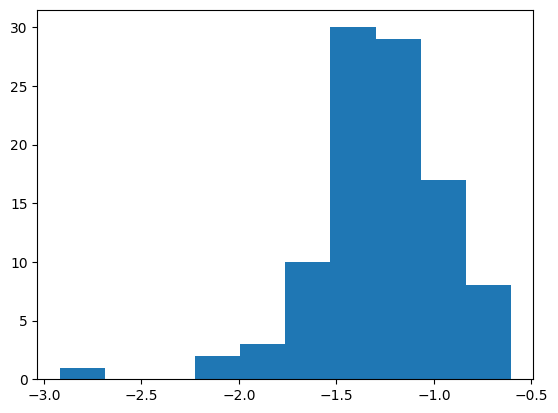

In [12]:
plt.hist(sample[:, 4])

(array([ 2.,  3.,  4.,  7.,  8., 20., 20., 18., 14.,  4.]),
 array([-3.5238327 , -3.25382274, -2.98381277, -2.71380281, -2.44379284,
        -2.17378288, -1.90377292, -1.63376295, -1.36375299, -1.09374302,
        -0.82373306]),
 <BarContainer object of 10 artists>)

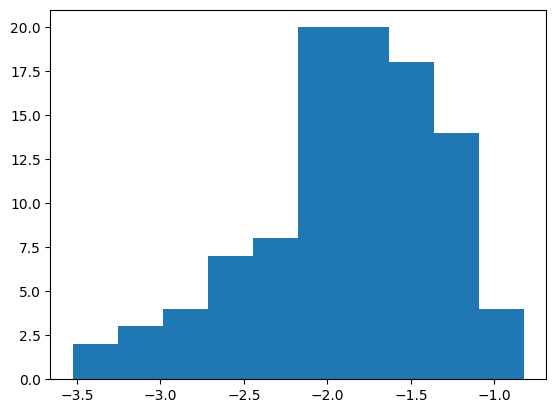

In [10]:
plt.hist(sample[:, 3])

(array([ 9., 14., 21., 20., 14.,  7., 11.,  0.,  1.,  3.]),
 array([0.02948621, 0.07041664, 0.11134708, 0.15227751, 0.19320795,
        0.23413838, 0.27506882, 0.31599925, 0.35692969, 0.39786013,
        0.43879056]),
 <BarContainer object of 10 artists>)

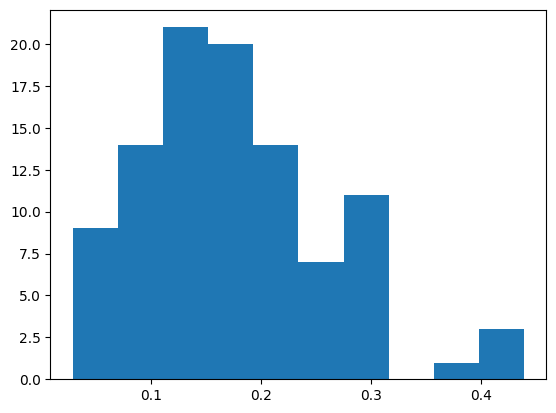

In [11]:
plt.hist(np.exp(sample[:, 3]))

In [4]:
np.median(np.exp(sample), 0)

array([0.05869509, 0.08706103, 0.23430604, 0.16775675, 0.29267328,
       0.49375677, 5.04852842])

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>, <Axes: xlabel='5', ylabel='2'>,
        <Axes: xlabel='6', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>,
        <Axes: xlabel='4', ylabel='3'>, <Axes: xlabel='5', ylabel='3'>,
        <Axes

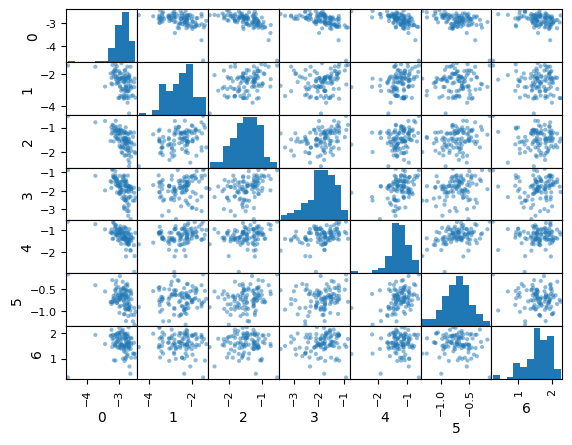

In [29]:
pd.plotting.scatter_matrix(pd.DataFrame(sample))